<a href="https://colab.research.google.com/github/karmasta13/data-science-station/blob/main/The_Bayesian_Alien_ADI_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We start by installing some packages we need, and importing a module called AlienPollster

In [1]:
%%capture

# Here we're just installing/updating, and then importing the libraries we need
# FYI, %%capture suppresses the output of your code block

!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade -q gspread

url = "https://raw.githubusercontent.com/bhasiEF/FDS_Wk5/main/AlienPollster.py"
!wget --no-cache --backups=1 {url}

import AlienPollster
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

### You are an Alien, and you just crash landed somewhere in the continental USA, on November 7, 2016.


### You step out of your spaceship, and you start walking around. You encounter the locals, and you use your shape-shifting technology to blend in as one of them, and translation technology to speak their language.



In [2]:
location = AlienPollster.crash_land()

You realize that there is an election the next day with two candidates: **H**illary Clinton and Donald **T**rump. You were a pollster on your home planet, so this excites you. You want to try and update your beliefs about the upcoming election, with as little knowledge of the place you have crash landed in.

As a pollster, your job is to quantify the proportion of people who support one candidate over the other, and also quantify your uncertainty around your estimate.

### Step 1. List your hypotheses


You remember your old stats professor had mentioned a certain approach to statistics based on scientific thinking & probabilistic reasoning ... it was named after some Reverend in a far away planet ... but who knows. Anyhow, you remember that you must start by enumerating the set of hypotheses that might describe the preferences of the area where you crash landed. Let us define $p$ to be the proportion of people who prefer **H**illary.

On one extreme, every single person in your locality might prefer **T**rump. This would correspond to $p = 0$. On the other extreme, every single person in your locality might prefer **H**illary. This would correspond to $p = 1$. And any possibility in between is also plausible ... now you only care about estimating the proportion correctly to two digits worth of precision: $p = 0.5837624 ...$ is the same as $p = 0.58$ for all intents and purposes. Thus, you end up with 101 hypotheses, each one positing a unique value of $p$ for the true proportion of Hillary supporters in your area:

| Hypotheses | $p$ | Comment                                                          |
|------------|----------|------------------------------------------------------------------|
| 0          | 0.00     | Everyone prefers **T**rump.                   |
| 1          | 0.01     | **1%** of people in the locality prefer **H**illary.   |
| 2          | 0.02     | **2%** of people in the locality prefer **H**illary.   |
| ...        | ...      | ...                                                              |
| 49         | 0.49     | **49%** of people in the locality prefer Hillary.  |
| 50         | 0.5      | It's an even-split (50-50).                           |
| 51         | 0.51     | **51%** of people in the locality prefer Hillary.  |
| ...        | ...      | ...                                                              |
| 98         | 0.98     | **98%** of people in the locality prefer Hillary.  |
| 99        | 0.99     | **99%** of people in the locality prefer Hillary. |
| 100        | 1.00      | Everyone prefers **H**illary.                 |

**Remember**: Python starts counting from zero!

In [3]:
# create a NumPy array called hypo of length 101, containing the values of p corresponding to each of your hypotheses

hypo = np.linspace(0, 1, 101)

# hypo = np.arange(101)
print(hypo)



[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


### Step 2. Define your prior beliefs


How confident are you in each of these hypotheses? In two-party systems, the proportion of people who support one candidate over the other can range anywhere from 0 to 1. Either extreme represents a rubber-stamp election or an electoral mandate, while values close to 0.5 represent a tightly contested election. Given, you've just crash landed in this strange place, and you know nothing about it ... you have no reason to particularly think that this is a competetive election or that it will be a landslide. You frankly have no clue.

In the absence of any useful information, how do you assign probability values to each of your hypotheses? Here is a [hint](https://en.wikipedia.org/wiki/Principle_of_indifference).

In [4]:
# create a NumPy array called prior of length 101, containing the values of p corresponding to each of your hypotheses

prior = np.full((101), 1/101)
print(prior)



[0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.0099

### Step 3. Go and get data!

You select 20 people to poll, taking great care to randomize your selection and make sure its representative of the area you've landed in. The results of your poll are as follows:

In [5]:
poll = AlienPollster.poll(location,20)

for x in poll:
  print(x)

Donald Trump
Hillary Clinton
Donald Trump
Hillary Clinton
Hillary Clinton
Donald Trump
Hillary Clinton
Hillary Clinton
Hillary Clinton
Donald Trump
Hillary Clinton
Hillary Clinton
Hillary Clinton
Hillary Clinton
Hillary Clinton
Donald Trump
Hillary Clinton
Donald Trump
Donald Trump
Donald Trump


In [6]:
# convert your poll data into a NumPy array of 0s and 1s, where 0 means Donald Trump and 1 means Hillary Clinton
map = {'Donald Trump': 0, 'Hillary Clinton': 1}
data = np.array([map[x] for x in poll])
print(data)


[0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0]


### Step 4. Compute likelihoods

Now the data you have gathered will make more sense under some hypotheses than others. For instance, if you have even one **H**illary Clinton supporter in your poll, then the $p = 0$ hypothesis no longer makes sense. And similarly if you have a 50-50 split in your poll, then it should be intuitive that $p = 0.5$ makes more sense than say $p = 0.2$ or $p = 0.9$.

But we can quantify this precisely, by considering the probability of getting the exact poll data you got, under the assumption of each hypothesis. In order to see how, let's look at an easier example:

Suppose we polled just 2 people, and our data looked like this: `['Hillary Clinton', 'Donald Trump']`. How probable is getting this data? Well, since the responses of different individuals are independent, this is the same as asking what's the probability I randomly selected a Hillary supporter \& then after that randomly selected a Trump supporter.

$P(\textrm{Hillary}) \times P(\textrm{Trump}) = p \times (1-p)$

So, if we consider some example hypotheses:
  
*   for $p = 0.2$, this would be $0.2 \times 0.8 = 0.16$.
*   for $p = 0.5$, this would be $0.5 \times 0.5 = 0.25$.
*   for $p = 0.9$, this would be $0.9 \times 0.1 = 0.09$.


So we see that the general expression $P(\textrm{Hillary}) \times P(\textrm{Trump}) = p \times (1-p)$, allows us to compute the likelihood of the data for each hypothesis.



In [7]:
# using the NumPy arrays hypo and data from earlier, construct a new NumPy array of length 101 called likellihood,
# containing the likelihoods of getting the exact 20-person poll data we got, given each of the hypotheses in hypo


likelihood = (hypo** sum(data)) * (1-hypo)**(len(data)-sum(data))
print(likelihood)


[0.00000000e+00 9.22744694e-25 3.48472534e-21 4.16513355e-19
 1.21029088e-17 1.61967879e-16 1.32689890e-15 7.74533254e-15
 3.52681324e-14 1.32813203e-13 4.30467210e-13 1.23547020e-12
 3.20653755e-12 7.64670346e-12 1.69638349e-11 3.53546477e-11
 6.97708607e-11 1.31223554e-10 2.36472629e-10 4.10131723e-10
 6.87194767e-10 1.11595907e-09 1.76128238e-09 2.70806967e-09
 4.06484171e-09 5.96719474e-09 8.58092159e-09 1.21045333e-08
 1.67708992e-08 2.28477146e-08 3.06365161e-08 4.04699858e-08
 5.27073330e-08 6.77276022e-08 8.59208350e-08 1.07677109e-07
 1.33373578e-07 1.63359759e-07 1.97941417e-07 2.37363515e-07
 2.81792804e-07 3.31300715e-07 3.85847271e-07 4.45266798e-07
 5.09256210e-07 5.77366632e-07 6.48999047e-07 7.23404577e-07
 7.99689875e-07 8.76827918e-07 9.53674316e-07 1.02898905e-06
 1.10146328e-06 1.16975066e-06 1.23250239e-06 1.28840495e-06
 1.33621929e-06 1.37482023e-06 1.40323447e-06 1.42067584e-06
 1.42657607e-06 1.42061003e-06 1.40271373e-06 1.37309437e-06
 1.33223149e-06 1.280868

### Step 5. Compute the marginal likelihood

Now you remember that this bit always tripped you up a bit. But you vaguely remember your stats professor using this tool (Bayes' theorem, was it called?) in the context of cancer, game shows, and court cases. In those examples, all this bit was doing was serving as a consistency check.

When using probabilities to quantify beliefs across hypotheses, you need your probabilities to add up to 1, which is equivalent to saying that you assert that one of these hypotheses has to be true.

After you update you beliefs upon inspection of the data, that still needs to be true. Your probabilities need to still add up to 1. We need the marginal likelihood, in order to ensure this.

You remember your stats professor also calling it a weighted average of the likelihoods ... take the likelihood associated with each hypothesis, weight it by your prior belief in that hypothesis, and add it up. You have a sort of average likleihood ... i.e. the likelihood of seeing this data across all competing hypotheses.

In [8]:
# using the NumPy arrays likelihood and prior from earlier, calculate the marginal likelihood and assign it to a variable called marg_likelihood
# note that this will be one number, not an array, because it's independent of the hypotheses!

marg_likelihood = np.sum(likelihood*prior)
print(marg_likelihood)


3.742761919508396e-07


## Step 6. Put it all together, and arrive at your posterior beliefs

You've seen the theorem you're using written like this:

$P(H|E) = \frac{P(E|H) \times P(H)}{P(E)}$

or equivalently

$\textrm{posterior} = \frac{\textrm{likelihood}  \times \textrm{prior} }{\textrm{marginal likelihood} }$

So let's do it!

In [9]:
# using the NumPy arrays likelihood and prior plus the value of the marginal likelihood,
# construct a NumPy array called posterior, of length 101, containing your updated degree of belief in each of the hypotheses

posterior = (likelihood*prior) / marg_likelihood
print(sum(posterior))
print(np.cumsum(posterior))
print(prior)


1.0
[0.00000000e+00 2.44100113e-20 9.22082888e-17 1.11105276e-14
 3.31277246e-13 4.61592692e-12 3.97173123e-11 2.44610016e-10
 1.17758261e-09 4.69098325e-09 1.60784337e-08 4.87611918e-08
 1.33585974e-07 3.35869573e-07 7.84625774e-07 1.71988702e-06
 3.56558444e-06 7.03693296e-06 1.32925090e-05 2.41420105e-05
 4.23208547e-05 7.18421012e-05 1.18434537e-04 1.90073000e-04
 2.97603103e-04 4.55457482e-04 6.82454608e-04 1.00266430e-03
 1.44631664e-03 2.05072322e-03 2.86117243e-03 3.93175329e-03
 5.32605727e-03 7.11770294e-03 9.39062693e-03 1.22390849e-02
 1.57673095e-02 2.00887795e-02 2.53250624e-02 3.16042056e-02
 3.90586679e-02 4.78227977e-02 5.80298856e-02 6.98088399e-02
 8.32805509e-02 9.85540346e-02 1.15722461e-01 1.34859188e-01
 1.56013944e-01 1.79209287e-01 2.04437501e-01 2.31658069e-01
 2.60795848e-01 2.91740081e-01 3.24344330e-01 3.58427408e-01
 3.93775352e-01 4.30144434e-01 4.67265177e-01 5.04847310e-01
 5.42585525e-01 5.80165917e-01 6.17272885e-01 6.53596311e-01
 6.88838763e-01 7.22

# Let's compare our prior and posterior beliefs!

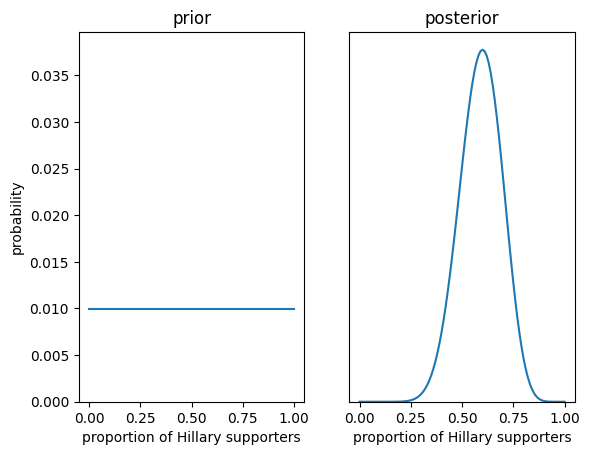

In [10]:
fig, ax  = plt.subplots(1,2) # generates a figure with two subplots

ax[0].plot(hypo,prior) # plots prior on first subplot
# sets the ylims so that the minimum is zero (probabilities cannot be negative)
# and the maximum is a tad more than the max of the posterior, so both graphs
# can have the same scale, and all the data will fit the plot area
ax[0].set_ylim([0, 1.05*np.amax(posterior)])
# sets titles and axis labels
ax[0].set_title('prior')
ax[0].set_ylabel('probability')
ax[0].set_xlabel('proportion of Hillary supporters')

ax[1].plot(hypo,posterior) #plots posterior on the second subplot
#sets the y lims so that two plots have same y-axis and data stays in the range of the plot area
ax[1].set_ylim([0, 1.05*np.amax(posterior)])
# gets rid of y-axis labels and ticks, because the two graphs share the same y-axis
ax[1].axes.yaxis.set_visible(False)
# sets titles and x-axis label
ax[1].set_title('posterior')
ax[1].set_xlabel('proportion of Hillary supporters');

OK, that's neat! You can see how our beliefs evolved ... it's almost like horses racing, but instead it's hypotheses, each running in their own lane. Some of them got ahead, others fell behind. Now you might think of this as being not so helpful: if you had to come up with a number that reflects your best guess about the preferences of your locality, what would you say?

# Now as a pollster, you need a headline figure ...



Well, you have some options! You can report the most likely hypothesis and say that's your best guess. That would be picking out the **mode** of your posterior distribution. Alternatively, you could pick out the hypothesis that lies in the middle of your posterior distribution: my posterior belief tells me there's a 50% chance that $p$ is lower than this value and a 50% chance that it's above this value. That would be the **median**.

And then there's the **mean**. Have a think about how to compute that one!

Hint for the median: There are two functions in numpy that'll make your job of calculating the median very simple: `cumsum` and `interp`. See if you can figure it out from there...


Hints for the mean:

*   It's going to look very similar to how you calculated `marg_likelihood`, but with different arrays!)
*   If you add up each possible value of `p` from your list of hypotheses and divide by the total number of hypotheses, you would always get 0.5, regardless of what's going on in the posterior. So that can't be right. So how do we incorporate the information contained in the posterior to calculate the mean? This is going to be remarkably similar to something you've done in the Dice Games notebook ...







In [11]:
# Calculate the mode, median, and mean of the posterior distribution, as ways to arrive at a single number to reflect your best guess.

mode = hypo[np.argmax(posterior)]
print(mode)
median = np.interp(0.5, np.cumsum(posterior), hypo)
print(median)
mean = np.sum(hypo*posterior)
print(mean)


0.6
0.5887102089513677
0.590909090909092


Let's take this a step further. In statistics, we typically report our uncertainty using [confidence intervals](https://brilliant.org/wiki/confidence-intervals/): "we are 95% sure the true proportion of **H**illary supporters lies between $x$% and $y$%."

How might you report a 95% confidence interval in this case, i.e. how would you find the values of x & y?

**Hint:** The two NumPy functions `cumsum` and `interp`, which you used when computing the median, are all you need for this as well!

In [12]:
# calculate a lower_bound and upper_bound estimate, between which 95% of your posterior belief lies

lower_bound = np.interp(0.025, np.cumsum(posterior), hypo)*100

upper_bound = np.interp(0.975, np.cumsum(posterior), hypo)*100

print(f"I am 95% sure that the true proportion of Hillary supporters lies between {lower_bound:.2f}% and {upper_bound:.2f}%.")

I am 95% sure that the true proportion of Hillary supporters lies between 37.94% and 77.69%.


# What if you extended your poll ...

Suppose you actually ran a 20-person poll, 100 times. Each time you look at one set of poll data you update your beliefs, and you update your beliefs over and over, i.e. 100 times. How would this look?

In [13]:
# Starting with the same prior as before, write a loop that generates 20-person polls 100 times, each time updating your beliefs and getting a new posterior
# Each time you calculate a posterior, append it to a list `evolving_beliefs`, so that at the end of you code, your list contains your initial prior and the posteriors you computed after each trial.
# Remember, your posterior at the end of one round becomes your prior at the beginning of the next round
# Note: your hypotheses stay the exact same as before!

# I've just started you off with the code for generating a fresh poll 100 times.
evolving_beliefs = [prior]
for i in range(100):

  poll = AlienPollster.poll(location,20)
  map = {'Donald Trump': 0, 'Hillary Clinton': 1}
  data = np.array([map[x] for x in poll])
  likelihood = (hypo** sum(data)) * (1-hypo)**(len(data)-sum(data))
  marg_likelihood = np.sum(likelihood*prior)
  posterior = (likelihood*prior) / marg_likelihood
  evolving_beliefs.append(posterior)
  prior = posterior

print(evolving_beliefs[:3])





[array([0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.0099

## Now let's visualize our evolving beliefs!

In [14]:
#generates a fig and axis object
fig, ax = plt.subplots()
#generates a line object corresponding to the line we will be updating in the animation
line, = ax.plot(hypo, evolving_beliefs[0]);
#max is the highest value the posterior ever takes ... useful for setting our plot area
#to make sure our data never fall out of the plot
max = np.amax([np.amax(i) for i in evolving_beliefs])
#set y-axis limits
ax.set_ylim([0, 1.05*max])
#adds an annotation indicating which trial the posterior corresponds to
ann = ax.annotate('Initial prior',(0.6,0.8*max))
#adds axis labels
ax.set_title('updated beliefs')
ax.set_ylabel('probability (degree of belief)')
ax.set_xlabel('probability of flipping heads')
#prevents the plot from being displayed,
#so that we can just have the animation when it's ready
plt.close()

def init():  # starts with a clean slate by turning line into a null line (no values)
  line.set_ydata([np.nan] * len(hypo))
  return line,

def animate(i): #updates line using the arrays in evolving_beliefs, and updates the annotation
  global ann # indicate that here we're referring to the global variable ann
  ann.remove() # remove the previous annotation
  line.set_ydata(evolving_beliefs[i])  # update the data.
  #add a new annotation
  if i == 0:
    ann = ax.annotate('Initial Prior',(0.6,0.8*max))
  else:
    ann = ax.annotate(f'Posterior after trial {i}',(0.6,0.8*max))
  return line, #returns the new line

ani = animation.FuncAnimation(
  fig, animate, frames = 101, init_func=init, interval=50, blit=True) # generates the animation

rc('animation', html='jshtml') #allows us to view the animation

ani # returns the animation object by being the last line of the cell, to be viewed

# What if you had used a smarter prior?

Suppose, you decide to do a bit more background research about elections in the United States. You realize that election results are reported by county, and there are many little counties in this so called United States. You stumble upon the previous election's data, and look at the proportion of support for the Democratic candidate (Obama).

Now you want to keep this interesting, so you purposefully avoid finding out which county you landed in. Instead, you find a map of the continental US, and decide to simulate lots of crash landings, by throwing darts at the map randomly. With each throw of the dart, you note which county the dart lands on, and you jot down the proportion of Obama supporters in the 2012 election for that county.

After doing this over and over, you plot the distribution of Democratic support across the many crash landings:

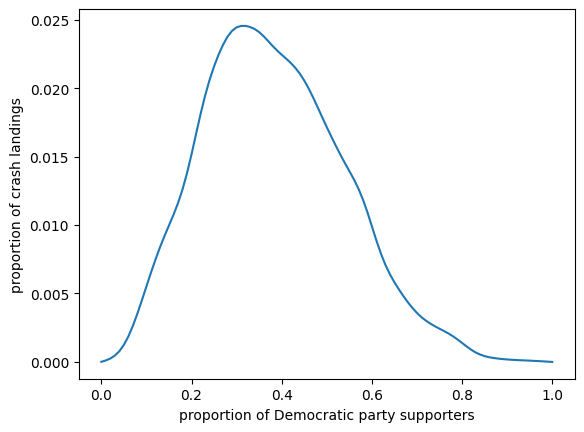

In [15]:
plt.plot(hypo, AlienPollster.prior_2012(hypo))
plt.xlabel('proportion of Democratic party supporters')
plt.ylabel('proportion of crash landings');

You look at the results, and you're a bit puzzled. Based on your research, Obama won that election, but the distribution peaks around just 31% support for Obama. How come?

You then realize that something quite common across contexts is going on: [an urban-rural political divide](https://en.wikipedia.org/wiki/Urban%E2%80%93rural_political_divide)! You're familiar with this in your home planet -- often folks in rural areas vote on average quite differently from their urban counter parts, and because rural areas are more expansive in terms of land area, a random crash landing favors rural areas to be over-represented!

Though you know that every election is different, based on the history of US elections, in general the previous election is not a bad place to start for callibrating our beliefs about the current election. You realize that you can use the distribution above as your prior beliefs in a Bayesian update ... taking into account a richer idea of US geography and politics, even though you don't know exactly where you landed and how politics has changed since 2012.

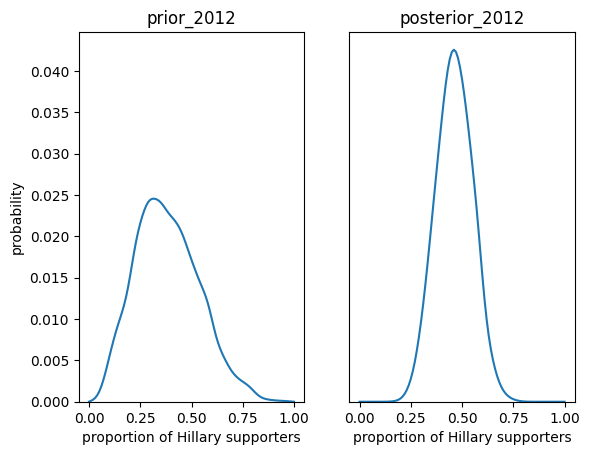

In [16]:
# Starting with the prior distribution from above (I've already started you off with the code)
# write code representing one round of Bayesian update after looking at just one 20-person poll

prior_2012 = AlienPollster.prior_2012(hypo)

poll_2012 = AlienPollster.poll(location,20)
map_2012 = {'Donald Trump': 0, 'Hillary Clinton': 1}
data_2012 = np.array([map_2012[x] for x in poll_2012])

likelihood_2012 = (hypo** sum(data_2012)) * (1-hypo)**(len(data_2012)-sum(data_2012))
#print(likelihood_2012)

marg_likelihood_2012 = np.sum(likelihood_2012*prior_2012)
#print(marg_likelihood_2012)

posterior_2012 = (likelihood_2012*prior_2012) / marg_likelihood_2012
#print(sum(posterior))
#print(np.cumsum(posterior))




fig, ax  = plt.subplots(1,2) # generates a figure with two subplots

ax[0].plot(hypo,prior_2012) # plots prior on first subplot
# sets the ylims so that the minimum is zero (probabilities cannot be negative)
# and the maximum is a tad more than the max of the posterior, so both graphs
# can have the same scale, and all the data will fit the plot area
ax[0].set_ylim([0, 1.05*np.amax(posterior_2012)])
# sets titles and axis labels
ax[0].set_title('prior_2012')
ax[0].set_ylabel('probability')
ax[0].set_xlabel('proportion of Hillary supporters')

ax[1].plot(hypo,posterior_2012) #plots posterior on the second subplot
#sets the y lims so that two plots have same y-axis and data stays in the range of the plot area
ax[1].set_ylim([0, 1.05*np.amax(posterior_2012)])
# gets rid of y-axis labels and ticks, because the two graphs share the same y-axis
ax[1].axes.yaxis.set_visible(False)
# sets titles and x-axis label
ax[1].set_title('posterior_2012')
ax[1].set_xlabel('proportion of Hillary supporters');


You then decide that you're tired of making this too difficult. You'll just figure out which county you're in, and use that to assign prior beliefs. To do this, you construct a bell curve around the previous election's proportion of Democratic supporters, with some spread to allow for the possibility of inevitable changes associated with the changing times.

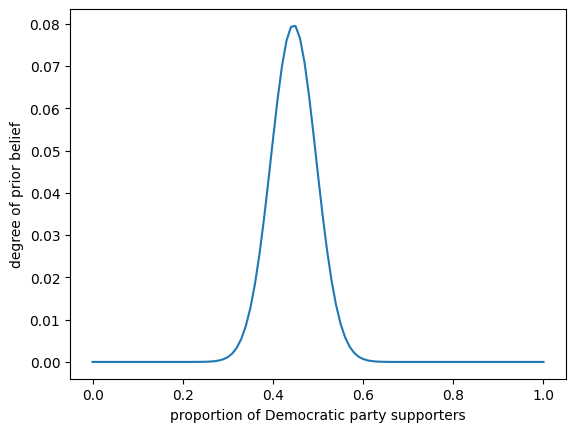

In [17]:
plt.plot(hypo, AlienPollster.prior_loc_2012(location, hypo, sigma=0.05))
plt.xlabel('proportion of Democratic party supporters')
plt.ylabel('degree of prior belief');

Again, though you know that every election is different, based on the history of US elections, in general the previous election is not a bad place to start for callibrating our beliefs about the current election. This time, you've got even more background knowledge, because you've taken into account exactly where you landed.

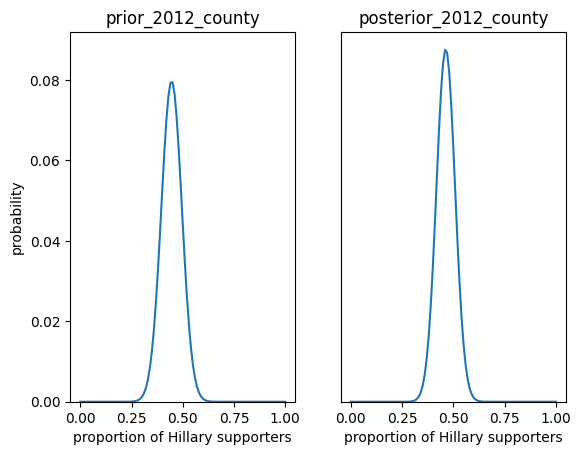

In [18]:
# Starting with the prior distribution from above (I've already started you off with the code)
# write code representing one round of Bayesian update after looking at just one 20-person poll

prior_2012_county = AlienPollster.prior_loc_2012(location, hypo, sigma=0.05)

poll_2012_county = AlienPollster.poll(location,20)

map_2012_county = {'Donald Trump': 0, 'Hillary Clinton': 1}
data_2012_county = np.array([map_2012_county[x] for x in poll_2012_county])

likelihood_2012_county = (hypo** sum(data_2012_county)) * (1-hypo)**(len(data_2012_county)-sum(data_2012_county))
#print(likelihood_2012)

marg_likelihood_2012_county = np.sum(likelihood_2012_county*prior_2012_county)
#print(marg_likelihood_2012)

posterior_2012_county = (likelihood_2012_county*prior_2012_county) / marg_likelihood_2012_county
#print(sum(posterior))
#print(np.cumsum(posterior))




fig, ax  = plt.subplots(1,2) # generates a figure with two subplots

ax[0].plot(hypo,prior_2012_county) # plots prior on first subplot
# sets the ylims so that the minimum is zero (probabilities cannot be negative)
# and the maximum is a tad more than the max of the posterior, so both graphs
# can have the same scale, and all the data will fit the plot area
ax[0].set_ylim([0, 1.05*np.amax(posterior_2012_county)])
# sets titles and axis labels
ax[0].set_title('prior_2012_county')
ax[0].set_ylabel('probability')
ax[0].set_xlabel('proportion of Hillary supporters')

ax[1].plot(hypo,posterior_2012_county) #plots posterior on the second subplot
#sets the y lims so that two plots have same y-axis and data stays in the range of the plot area
ax[1].set_ylim([0, 1.05*np.amax(posterior_2012_county)])
# gets rid of y-axis labels and ticks, because the two graphs share the same y-axis
ax[1].axes.yaxis.set_visible(False)
# sets titles and x-axis label
ax[1].set_title('posterior_2012_county')
ax[1].set_xlabel('proportion of Hillary supporters');


#posterior_2012_county =